<a href="https://colab.research.google.com/github/leslyyuvicela/PrograIII-2024-Semi/blob/Bloque_3/IA_de_numeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importar las librerias necesarias.
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import tensorflow_datasets as tfds

In [2]:
#cargamos el dataset
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
datos_entrenamiento, datos_prueba = dataset['train'], dataset['test']
#print(datos_entrenamiento)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
#asignacion de etiquetas
numero_letras = ["Cero", "Uno", "Dos", "Tres", "Cuatro", "Cinco", "Seis", "Siete", "Ocho", "Nueve"]

In [4]:
#pasar los datos del dataset a variables
numeros_ejemplo_entrenamiento = metadata.splits['train'].num_examples
#print(numeros_ejemplo_entrenamiento)

numeros_ejemplo_prueba = metadata.splits['test'].num_examples
#print(numeros_ejemplo_prueba)

In [5]:
img = datos_prueba.take(1)
print(img)

<_TakeDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [6]:
#funcion normalizadora de los pixeles de 0 a 255 para que vaya de 0 a 1
def normalizacion(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 # 138/255 = 0.541176
  return imagenes, etiquetas

In [7]:
#normalizamos los datos de entrenamiento y prueba
datos_entrenamiento = datos_entrenamiento.map(normalizacion)
datos_prueba = datos_prueba.map(normalizacion)

In [8]:
#creamos el modelo de nuestra red neuronal.
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
#compilamos el modelo de la red neuronal.
modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
#entrenamos la red neuronal por lotes.
tamano_lote = 32 #60,000/32 = 1875 imagenes.
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(numeros_ejemplo_entrenamiento).batch(tamano_lote)
datos_prueba = datos_prueba.repeat().shuffle(numeros_ejemplo_prueba).batch(tamano_lote)
#

In [11]:
#entrenamos nuestro modelo de datos.
modelo.fit(datos_entrenamiento, epochs=5,
           steps_per_epoch=math.ceil(numeros_ejemplo_entrenamiento/tamano_lote))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8534 - loss: 0.4944
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9609 - loss: 0.1336
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9693 - loss: 0.1004
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9778 - loss: 0.0722
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9808 - loss: 0.0615


In [12]:
#evaluamos el modelo.
test_loss, test_accuracy = modelo.evaluate(datos_prueba, steps=math.ceil(numeros_ejemplo_prueba/tamano_lote))
print('Resultado de las pruebas: ', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9711 - loss: 0.0911
Resultado de las pruebas:  0.9718450307846069


In [13]:
#convertir en mtrices las imganes usando numpy
for imagenes_prueba, etiquetas_prueba in datos_prueba.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)
  print(predicciones)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[7.96090082e-13 4.39681125e-10 2.02281920e-12 1.43701334e-06
  1.77475743e-15 9.99998152e-01 6.31326236e-09 2.20437194e-13
  3.11000065e-07 8.34061922e-08]
 [2.22620811e-09 3.96478928e-15 3.80333737e-10 3.43323482e-12
  6.54643787e-12 1.93565317e-10 9.99999940e-01 4.06253373e-13
  6.66011246e-09 9.95289463e-14]
 [3.27124289e-05 4.53242194e-10 9.99920428e-01 7.92772607e-06
  8.87951671e-07 1.87953986e-09 4.20584847e-08 1.18271455e-05
  2.60540000e-05 1.10067977e-09]
 [3.28815382e-12 5.85633453e-09 3.92394339e-09 9.99956071e-01
  7.25991099e-13 4.28383464e-05 2.48943466e-12 1.57982211e-10
  2.78742842e-08 1.09254029e-06]
 [1.15776122e-09 1.81512032e-08 1.13545251e-09 3.94459335e-07
  9.99952972e-01 2.73031873e-07 1.53638838e-11 1.42203032e-06
  8.52267856e-09 4.48666724e-05]
 [3.56335675e-13 3.44811667e-07 1.26769064e-05 3.31025185e-05
  3.65592712e-12 6.78980816e-10 6.22141770e-13 9.99953806e-01
  5.61869384e-10 7.93651186e-11]
 [9.99781132e-01 1.5

In [14]:
def graficar_imagen(i, predicciones_array, etiquetas_reales, imagenes):
  predicciones_array, etiqueta_real, img = predicciones_array[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(predicciones_array)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("Prediccion: {}".format(numero_letras[etiqueta_prediccion]), color=color)

In [15]:
#graficamos los valores de las matrices.
def graficar_valores_predicciones(i, predicciones_array, etiquetas_reales):
  predicciones_array, etiqueta_real = predicciones_array[i], etiquetas_reales[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predicciones_array, color="#888888")
  plt.ylim([0, 1])
  etiqueta_prediccion = np.argmax(predicciones_array)

  thisplot[etiqueta_prediccion].set_color('red')
  thisplot[etiqueta_real].set_color('blue')

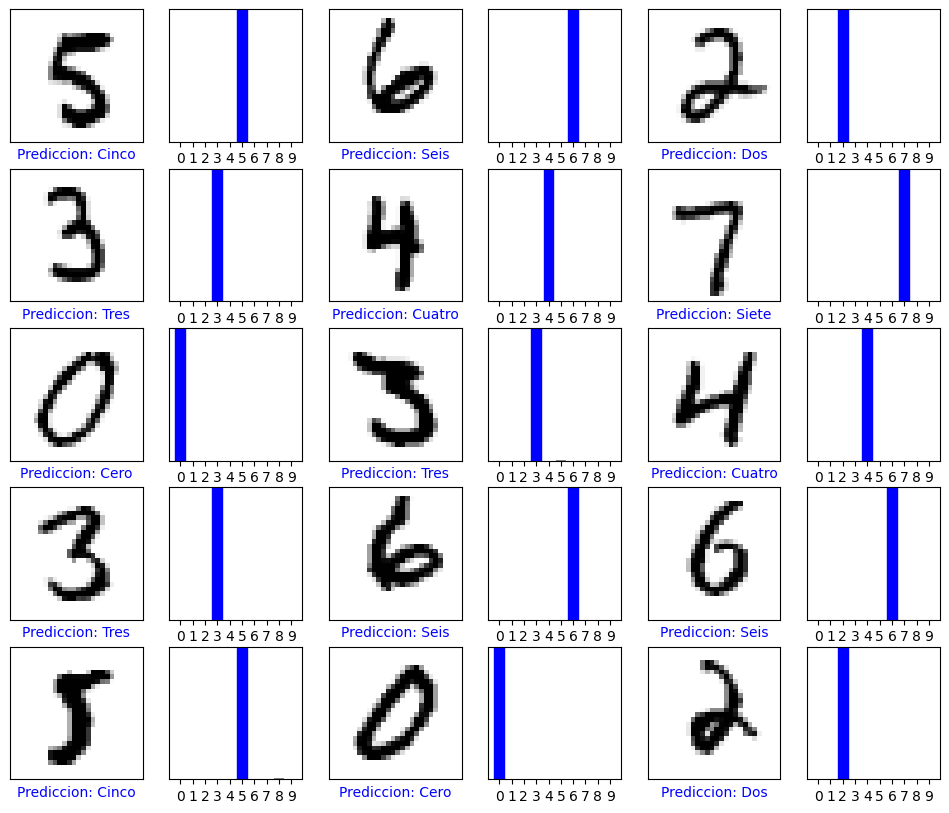

In [16]:
#Realizamos la grafica por cada imagen.
num_filas = 5
num_columnas = 3
num_imagenes = num_filas*num_columnas
plt.figure(figsize=(2*2*num_columnas, 2*num_filas))
for i in range(num_imagenes):
  plt.subplot(num_filas, 2*num_columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(num_filas, 2*num_columnas, 2*i+2)
  graficar_valores_predicciones(i, predicciones, etiquetas_prueba)
plt.show()